<a href="https://colab.research.google.com/github/UjjwalSaxena/Automold--Road-Augmentation-Library/blob/master/optimalprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import json

In [15]:
from google.colab import files
files.upload()

Saving project_data.csv to project_data.csv


{'project_data.csv': b'Geography,vendor,Risk,delivery_mix,Bid\r\nCollgCr,8,12,1,208500\r\nVeenker,1,12,2,181500\r\nCollgCr,8,12,1,223500\r\nCrawfor,9,12,4,140000\r\nNoRidge,8,12,2,250000\r\nMitchel,7,12,1,143000\r\nSomerst,1,12,1,307000\r\nNWAmes,8,12,4,200000\r\nOldTown,7,12,1,129900\r\nBrkSide,15,12,4,118000\r\nSawyer,1,12,1,129500\r\nNridgHt,8,14,1,345000\r\nSawyer,1,11,1,144000\r\nCollgCr,1,12,1,279500\r\nNAmes,1,11,4,157000\r\nBrkSide,4,15,4,132000\r\nNAmes,1,13,3,149000\r\nSawyer,11,9,1,90000\r\nSawyerW,1,10,1,159000\r\nNAmes,1,11,1,139000\r\nNridgHt,8,13,4,325300\r\nIDOTRR,4,14,1,139400\r\nCollgCr,1,13,1,230000\r\nMeadowV,12,12,1,129900\r\nSawyer,1,13,1,154000\r\nNridgHt,1,13,4,256300\r\nNAmes,1,12,4,134800\r\nNridgHt,1,13,1,306000\r\nNAmes,1,11,3,207500\r\nBrkSide,2,10,1,68500\r\nIDOTRR,9,8,1,40000\r\nSawyer,1,11,3,149350\r\nCollgCr,1,13,4,179900\r\nNAmes,1,10,1,165500\r\nNridgHt,12,14,1,277500\r\nNridgHt,8,13,1,309000\r\nCollgCr,1,10,4,145000\r\nNAmes,1,11,1,153000\r\nNAmes,1,

In [99]:
df = pd.read_csv('project_data.csv')
temp_copy=df
print(df)

     Geography  vendor  Risk  delivery_mix     Bid
0      CollgCr       8    12             1  208500
1      Veenker       1    12             2  181500
2      CollgCr       8    12             1  223500
3      Crawfor       9    12             4  140000
4      NoRidge       8    12             2  250000
5      Mitchel       7    12             1  143000
6      Somerst       1    12             1  307000
7       NWAmes       8    12             4  200000
8      OldTown       7    12             1  129900
9      BrkSide      15    12             4  118000
10      Sawyer       1    12             1  129500
11     NridgHt       8    14             1  345000
12      Sawyer       1    11             1  144000
13     CollgCr       1    12             1  279500
14       NAmes       1    11             4  157000
15     BrkSide       4    15             4  132000
16       NAmes       1    13             3  149000
17      Sawyer      11     9             1   90000
18     SawyerW       1    10   

In [100]:
from sklearn.preprocessing import MinMaxScaler

df= temp_copy
bid= df['Bid']
df = df.drop('Bid', axis=1)


col_names = df.select_dtypes(exclude=['object']).columns
print(col_names)
features = df[col_names]
# print(features.head())
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
df[col_names] = features

df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).apply(lambda x: x.astype('category')).apply(lambda x: x.cat.codes)

# print(categorical_features.head())
print(df.head())
print(bid)

Index(['vendor', 'Risk', 'delivery_mix'], dtype='object')
   Geography    vendor      Risk  delivery_mix
0          5  0.500000  0.588235          0.00
1         24  0.000000  0.588235          0.25
2          5  0.500000  0.588235          0.00
3          6  0.571429  0.588235          0.75
4         15  0.500000  0.588235          0.25
0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [101]:
from sklearn.decomposition import PCA
X = df.as_matrix()
test_n = df.shape[0]
pca = PCA()
pca.fit(X[:test_n,:], bid)
X = pca.transform(X)
X.shape

(1460, 4)

In [102]:
# X_train = X[:test_n,:]
X_train, X_test, y_train, y_test = ms.train_test_split(X, bid, test_size=0.2, random_state=0)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((1168, 4), (292, 4), (1168,), (292,))

In [103]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
# lr = linear_model.LinearRegression()
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(X_train, y_train)


prediction= regr.predict(X_test)
print(y_test[0:10], prediction)

529     200624
491     133000
459     110000
279     192000
655      88000
1013     85000
1403    282922
601     141000
1182    745000
687     148800
Name: Bid, dtype: int64 [125091.26729613 205502.23643814 125091.26729613 183123.36654785
 152511.45940903 125091.26729613 271009.63709754 172939.44332453
 278760.48714549 174168.15339972 156493.61418859 152039.52378955
 172939.44332453 125091.26729613 152511.45940903 152511.45940903
 173460.05167971 125091.26729613 152039.52378955 278760.48714549
 125091.26729613 152511.45940903 125091.26729613 152511.45940903
 172939.44332453 278760.48714549 152039.52378955 125091.26729613
 207198.33299346 125445.77729975 125091.26729613 173460.05167971
 172939.44332453 173460.05167971 271009.63709754 172939.44332453
 271710.32678797 130892.23056655 174168.15339972 271009.63709754
 205502.23643814 125445.77729975 196001.76889997 271009.63709754
 271009.63709754 125091.26729613 173460.05167971 152511.45940903
 152039.52378955 154343.82309087 271710.326787

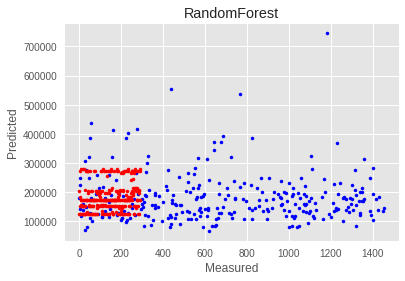

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()

ax.plot( y_test, 'b.')
ax.plot(prediction,'r.')
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RandomForest')
plt.show()

In [0]:
# from csv import DictReader
# with open("SelectedColumns.csv") as f:
#     a1 = [row for row in DictReader(f)]

# print(a1)
# import csv
# with open("SelectedColumns.csv", "rb") as f:
  
#     reader = csv.reader(f)
#     i = next(reader)

#     print(i)
 
import pandas

total_data=[]
bids=None
data = pandas.read_csv("SelectedColumns.csv", header=0)
for col in data.columns:
  if col!='SalePrice':
    total_data.append(eval('list(data.'+col+')'))
  else:
    total_bids= eval('list(data.'+col+')')
# print(data.columns.tolist())
# col_a = list(data.LotArea)
# col_b = list(data.b)
# col_c = list(data.c)

print(total_data)
print(total_bids)


datalength= len(total_bids)

[[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 11924, 12968, 10652, 10920, 6120, 11241, 10791, 13695, 7560, 14215, 7449, 9742, 4224, 8246, 14230, 7200, 11478, 16321, 6324, 8500, 8544, 11049, 10552, 7313, 13418, 10859, 8532, 7922, 6040, 8658, 16905, 9180, 9200, 7945, 7658, 12822, 11096, 4456, 7742, 13869, 6240, 8472, 50271, 7134, 10175, 2645, 11645, 13682, 7200, 13072, 7200, 6442, 10300, 9375, 9591, 19900, 10665, 4608, 15593, 13651, 7599, 10141, 10200, 5790, 1596, 8475, 8635, 10778, 10440, 13000, 4500, 10206, 8892, 8530, 16059, 11911, 3951, 8470, 8070, 7200, 8500, 13360, 7200, 9337, 9765, 10264, 10921, 10625, 9320, 10603, 9206, 7018, 10402, 7758, 9375, 10800, 6000, 8500, 11751, 9525, 7750, 9965, 21000, 7259, 3230, 11616, 8536, 12376, 8461, 21453, 6060, 9464, 7892, 17043, 6780, 4928, 4388, 7590, 8973, 14200, 12224, 7388, 6853, 10335, 10400, 10355, 11070, 9066, 15426, 10500, 11645, 8520, 10335, 9100, 2522, 6120, 9505, 7500, 6240, 10356, 13891, 14803, 13500, 1134

In [0]:
# characteristics = [[2,4,6,3,2,4,6,8,2,4],[222,444,233,112,443,532,223,297,211,328],[1000.1,234234.3,23434.5,46555.88, 78345.5,4566.6,22333.5,7777.3,657.3,67878.3],["canada","australia","canada","india","london","canada","india","australia","london","india"]]
# bids = [112, 3333, 2312, 998, 768, 470, 123, 6546, 866, 911]
characteristics=[]
test_data=[]
for ch in total_data:
  characteristics.append(ch[0:int(datalength*0.9)])
  test_data.append(ch[int(datalength*0.9):datalength])

bids=total_bids[0:int(datalength*0.9)]


print(characteristics)
print(test_data)
print(bids)

print(len(bids))

[[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 11924, 12968, 10652, 10920, 6120, 11241, 10791, 13695, 7560, 14215, 7449, 9742, 4224, 8246, 14230, 7200, 11478, 16321, 6324, 8500, 8544, 11049, 10552, 7313, 13418, 10859, 8532, 7922, 6040, 8658, 16905, 9180, 9200, 7945, 7658, 12822, 11096, 4456, 7742, 13869, 6240, 8472, 50271, 7134, 10175, 2645, 11645, 13682, 7200, 13072, 7200, 6442, 10300, 9375, 9591, 19900, 10665, 4608, 15593, 13651, 7599, 10141, 10200, 5790, 1596, 8475, 8635, 10778, 10440, 13000, 4500, 10206, 8892, 8530, 16059, 11911, 3951, 8470, 8070, 7200, 8500, 13360, 7200, 9337, 9765, 10264, 10921, 10625, 9320, 10603, 9206, 7018, 10402, 7758, 9375, 10800, 6000, 8500, 11751, 9525, 7750, 9965, 21000, 7259, 3230, 11616, 8536, 12376, 8461, 21453, 6060, 9464, 7892, 17043, 6780, 4928, 4388, 7590, 8973, 14200, 12224, 7388, 6853, 10335, 10400, 10355, 11070, 9066, 15426, 10500, 11645, 8520, 10335, 9100, 2522, 6120, 9505, 7500, 6240, 10356, 13891, 14803, 13500, 1134

In [0]:





from sklearn import datasets
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import linear_model
import numpy as np
import numbers

def normalize(x_array):
    x_array = np.asarray(x_array)
    return (x_array - min(x_array))/(max(x_array)-min(x_array))

def create_records(x_array):
    return np.transpose(x_array)

def convert_to_numeric(x_array, test = None):
    le = preprocessing.LabelEncoder()
    le.fit(np.unique(x_array))
    if test is None:
        return le.transform(x_array)
    else:
        return le.transform(test)

def correctify_data(characteristics):
    min_length = len(characteristics[0])
    print(min_length)
    new_characteristics=[]
    for characteristic in characteristics:
        if len(characteristic) < min_length:
            min_length = len(characteristic)


    for characteristic in characteristics:
        if type(characteristic[0]) == type("string"):
            numeric_labels = convert_to_numeric(characteristic[:min_length])
            new_characteristics.append(normalize(numeric_labels))  # confused about this
        else:
            new_characteristics.append(normalize(characteristic[:min_length]))
    return new_characteristics

def correctify_test_data(characteristics, test_data):
    new_test_data=[]
    for i in range(len(test_data)):

        if not isinstance(test_data[i], numbers.Number) :
            numeric_labels = convert_to_numeric(characteristics[i])
            numeric_test = convert_to_numeric(characteristics[i], test=[test_data[i]])
            new_test_data.append((numeric_test[0] - min(numeric_labels)) / (max(numeric_labels) - min(numeric_labels)))
        else:
            new_test_data.append((test_data[i] - min(characteristics[i])) / (max(characteristics[i]) - min(characteristics[i])))
    return new_test_data

# characteristics = [[2,4,6,3,2,4,6,8,2,4],[222,444,233,112,443,532,223,297,211,328],[1000.1,234234.3,23434.5,46555.88, 78345.5,4566.6,22333.5,7777.3,657.3,67878.3],["canada","australia","canada","india","london","canada","india","australia","london","india"]]
# bids = [112, 3333, 2312, 998, 768, 470, 123, 6546, 866, 911]
# characteristics is an array of 'n' un-normalized value-arrays of each characteristic.

new_characteristics = correctify_data(characteristics)
new_characteristics = create_records(np.asarray(new_characteristics, dtype=float))
# print(new_characteristics)
bids = np.asarray(bids, dtype=float)[:len(new_characteristics)]
# print(bids)
# clf = SVC()
clf = linear_model.LinearRegression()
clf.fit(new_characteristics, bids) #confused about this

#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

# test_data =[5, 555, 1200, "india"]
# print("test_data", test_data)
  
# test_data= 
# print(test_data)

test_data_new=[]
for t in create_records(np.asarray(test_data)):
#   print(t)
  test_data_new.append(correctify_test_data(characteristics, t))

# print("corrected test_data", test_data)
print("bids should have been: ", total_bids[int(datalength*0.9): datalength])
print("predictions: ",clf.predict(np.asarray(test_data_new).astype(float)))


1314


ValueError: ignored

In [1]:
from google.colab import files
files.upload()SelectedColumns

Saving SelectedColumns.csv to SelectedColumns.csv


{'SelectedColumns.csv': b'LotArea,LandContour,Neighborhood,BldgType,HouseStyle,Foundation,BsmtQual,Heating,HeatingQC,TotRmsAbvGrd,SalePrice\r\n8450,Lvl,CollgCr,1Fam,2Story,PConc,Gd,GasA,Ex,8,208500\r\n9600,Lvl,Veenker,1Fam,1Story,CBlock,Gd,GasA,Ex,6,181500\r\n11250,Lvl,CollgCr,1Fam,2Story,PConc,Gd,GasA,Ex,6,223500\r\n9550,Lvl,Crawfor,1Fam,2Story,BrkTil,TA,GasA,Gd,7,140000\r\n14260,Lvl,NoRidge,1Fam,2Story,PConc,Gd,GasA,Ex,9,250000\r\n14115,Lvl,Mitchel,1Fam,1.5Fin,Wood,Gd,GasA,Ex,5,143000\r\n10084,Lvl,Somerst,1Fam,1Story,PConc,Ex,GasA,Ex,7,307000\r\n10382,Lvl,NWAmes,1Fam,2Story,CBlock,Gd,GasA,Ex,7,200000\r\n6120,Lvl,OldTown,1Fam,1.5Fin,BrkTil,TA,GasA,Gd,8,129900\r\n7420,Lvl,BrkSide,2fmCon,1.5Unf,BrkTil,TA,GasA,Ex,5,118000\r\n11200,Lvl,Sawyer,1Fam,1Story,CBlock,TA,GasA,Ex,5,129500\r\n11924,Lvl,NridgHt,1Fam,2Story,PConc,Ex,GasA,Ex,11,345000\r\n12968,Lvl,Sawyer,1Fam,1Story,CBlock,TA,GasA,TA,4,144000\r\n10652,Lvl,CollgCr,1Fam,1Story,PConc,Gd,GasA,Ex,7,279500\r\n10920,Lvl,NAmes,1Fam,1Story,CB

In [0]:
# from csv import DictReader
# with open("SelectedColumns.csv") as f:
#     a1 = [row for row in DictReader(f)]

# print(a1)
# import csv
# with open("SelectedColumns.csv", "rb") as f:
  
#     reader = csv.reader(f)
#     i = next(reader)

#     print(i)
 
import pandas

total_data=[]
bids=None
data = pandas.read_csv("SelectedColumns.csv", header=0)
for col in data.columns:
  if col!='SalePrice':
    total_data.append(eval('list(data.'+col+')'))
  else:
    bids= eval('list(data.'+col+')')
# print(data.columns.tolist())
# col_a = list(data.LotArea)
# col_b = list(data.b)
# col_c = list(data.c)

print(total_data)
print(bids)

[[8450, 9600, 11250, 9550, 14260, 14115, 10084, 10382, 6120, 7420, 11200, 11924, 12968, 10652, 10920, 6120, 11241, 10791, 13695, 7560, 14215, 7449, 9742, 4224, 8246, 14230, 7200, 11478, 16321, 6324, 8500, 8544, 11049, 10552, 7313, 13418, 10859, 8532, 7922, 6040, 8658, 16905, 9180, 9200, 7945, 7658, 12822, 11096, 4456, 7742, 13869, 6240, 8472, 50271, 7134, 10175, 2645, 11645, 13682, 7200, 13072, 7200, 6442, 10300, 9375, 9591, 19900, 10665, 4608, 15593, 13651, 7599, 10141, 10200, 5790, 1596, 8475, 8635, 10778, 10440, 13000, 4500, 10206, 8892, 8530, 16059, 11911, 3951, 8470, 8070, 7200, 8500, 13360, 7200, 9337, 9765, 10264, 10921, 10625, 9320, 10603, 9206, 7018, 10402, 7758, 9375, 10800, 6000, 8500, 11751, 9525, 7750, 9965, 21000, 7259, 3230, 11616, 8536, 12376, 8461, 21453, 6060, 9464, 7892, 17043, 6780, 4928, 4388, 7590, 8973, 14200, 12224, 7388, 6853, 10335, 10400, 10355, 11070, 9066, 15426, 10500, 11645, 8520, 10335, 9100, 2522, 6120, 9505, 7500, 6240, 10356, 13891, 14803, 13500, 1134

## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

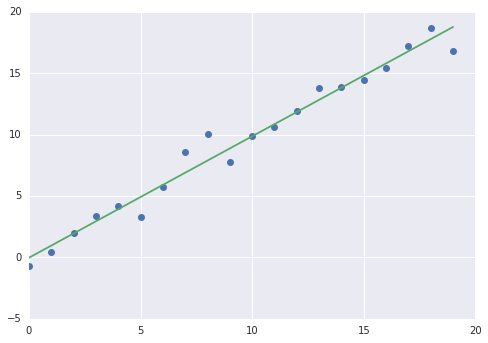

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

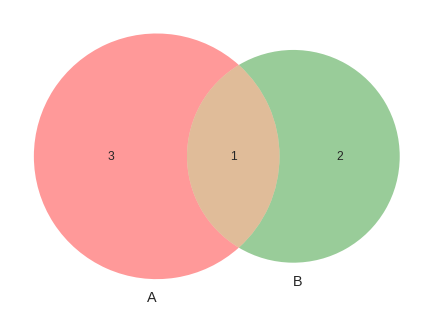

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).